# 5. 회귀(Regression)

## 5.1. 회귀 소개

- 회귀 분석 : 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 지도학습은 두 가지 유형으로 나눠진다.
    - **분류(Classification)** : 예측값이 카테고리와 같은 이산형 클래스 값
    - **회귀(Reggression)** : 예측값이 연속형 숫자 값
       - ***특히 선형 회귀가 가장 많이 사용된다.***
       
### 선형 회귀
- 실제 값과 예측값의 차이(오류의 제곱)을 최소화하는 직선형 회귀선을 최적화하는 방식
    - **일반 선형 회귀** : 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
    - **릿지(Ridge)** : 선형 회귀에 L2 규제를 적용한 회귀 모델, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델
    - **라쏘(Lasso)** : 선형 회귀에 L1 규제를 적용한 회귀 모델, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다. L1 규제는 피처 선택 기능이라고도 불린다.
    - **엘라스틱넷(ElasticNet)** : L2, L1 규제를 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용되며 L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정
    - **로지스틱 회귀(Logistic Regression)** : 분류에 사용되는 선형 모델. 매우 강력한 분류 알고리즘으로 이진 분류뿐만 아니라 희소 영역의 분류, 텍스트 분류와 같은 영역에서 뛰어난 예측 성능 자랑

## 5.2 단순 선형 회귀를 통한 회귀 이해

- 단순 선형 회귀 : 독립변수 1개, 종속변수 1개의 선형 회귀

- 회귀 모델의 선형 함수 f(x) = w0 + w1*X

- RSS의 정의 : 오류 값(실제 값 - 회귀 모델)의 제곱의 합

- ***RSS를 최소로 하는 w0, w1(회귀 계수)를 머신러닝 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심***

- 회귀에서 RSS는 비용(Cost)이며 w 변수(회귀 계수)로 구성되는 RSS를 비용함수라고 한다. 머신러닝 회귀 알고리즘은 데이터를 계속 학습하며 이 비용함수의 반환값(오류값)을 지속해서 감소시키고 최종적으로 더 이상 감소하지 않는 최소의 오류값을 구하는 것.
    - 비용함수를 손실함수(loss function)이라고도 한다

## 5.3 경사 하강법(Gradient Descent)

### 경사 하강법의 프로세스
1. $w_1, w_0$ 를 임의 값으로 설정, 첫 비용함수의 값(오차값)을 계산한다.
2. $w_1$을 $w_1 + n(2/N) \sum_{i=1}^N x_i (실제값_i - 예측값_i)$, $w_0$를 $w_0 + n(2/N) \sum_{i=1}^N x_i (실제값_i - 예측값_i)$으로 업데이트 한 후 다시 비용함수의 값을 계산한다. ($n$은 로마자로 에타, Learning rate, 학습률)
3. 비용함수가 감소하는 방향성으로 주어진 횟수만큼 2 단계를 반복하면서 $w_1, w_0$를 계속 업데이트

**실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성**

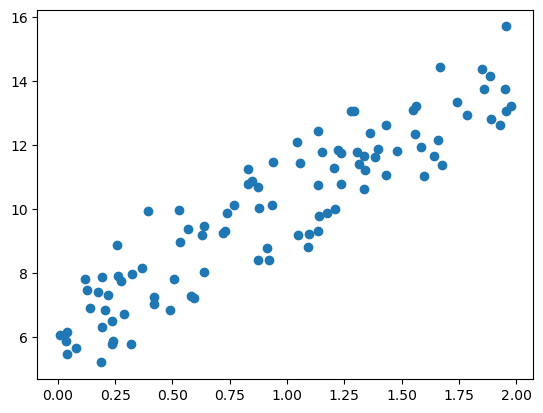

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [2]:
X.shape, y.shape

((100, 1), (100, 1))

**w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성**

* 예측 배열 y_pred는 np.dot(X, w1.T) + w0 임
100개의 데이터 $X(1,2,...,100)$이 있다면 예측값은 $w0 + X(1)*w1 + X(2)*w1 +..+ X(100)*w1$이며, 이는 입력 배열 $X$와 $w_1$ 배열의 ***내적***임.
* 새로운 $w_1$과 $w_0$를 update함
![](./image01.png)

$w_1$을 $w_1 + n(2/N) \sum_{i=1}^N x_i (실제값_i - 예측값_i)$, $w_0$를 $w_0 + n(2/N) \sum_{i=1}^N x_i (실제값_i - 예측값_i)$으로 업데이트 하는 함수 정의

In [3]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0 # 넘파이의 내적 연산 dot
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

$w_1$과 $w_0$ 정의

In [4]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

**반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 $w_1$과 $w_0$를 업데이트 하는 함수 생성**

In [5]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

**예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행**

In [6]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


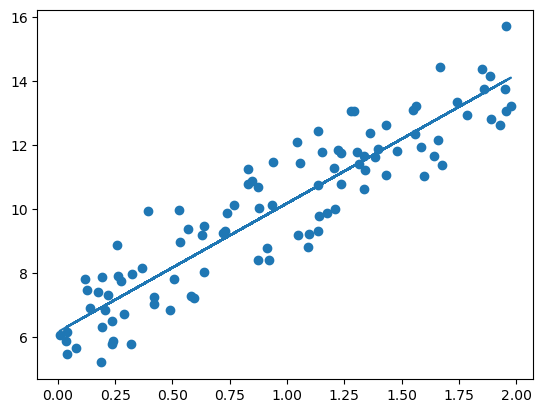

In [7]:
plt.scatter(X, y) 
plt.plot(X,y_pred) # y_pred에 기반한 회귀선 도출

**경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용 함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있다**

**때문에 실전에서는 대부분 '확률적 경사 하강법(Stochastic Gradient Descent)을 사용.**




### 확률적 경사 하강법
- 전체 입력 데이터로 $w$가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 $w$가 업데이트되는 값을 계산하므로 경사 하강법에 비해 빠른 속도를 보장
- 대용량 데이터의 경우 대부분 확률적 경사 하강법, 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수 도출
    - 미니 배치 확률적 경사 하강법을 stochastic_descent_steps() 함수는 앞에서 생성한 gradient_descent_steps()와 크게 다르지 않다. 다만 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 $w_1update, w_0update$를 계산하는 부분만 차이가 있다.

**미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출**

In [8]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))
  

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


- 경사 하강법의 결과와 큰 차이가 없으며 예측 오류 비용도 아주 조금 높은 수준으로 큰 예측 성능 상 차이가 없음.

## 5.4 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### LinearRegression 클래스 - Ordinary Least Squares
- LinearRegression 클래스는 예측값과 실제값의 RSS를 최소화 해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스이다.
- fit() method로 X, y 배열을 입력받으면 회귀 계수인 $W$를 coef_ 속성에 저장한다.

***class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)***


<입력 파라미터>
1. fit_intercept: 불린 값으로 디폴트는 True, 절편을 계산할 것인지 말지 결정, False의 경우 원점을 지나는 선형함수
2. normalize : 불린 값으로 디폴트는 False, fit_intercept가 True일 때만 활성화되며 회귀를 수행하기 전 입력 데이터 세트를 정규화

<속성>
1. coef_ : fit() 매서드를 수행했을 때 회귀 게수가 배열 형태로 저장하는 속성.
2. intercept_ : 교점 값

### 회귀 평가 지표
1. **MAE** : Mean Absolute Error(MAE)이며 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것
2. **MSE** : Mean Square Error(MSE)이며 실제 값과 예측값의 차이를 제곱해 평균한 것
3. **RMSE** : MSE는 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지려는 특성이 있으므로 MSE에 루트를 씌운 것
4. **$R^2$** : 분산 기반으로 예측 성능 평가, $예측값 Variance \over 실제값 Variance$

- 사이킷런은 RMSE를 제공하지 않으므로 MSE에 제곱근을 취해 계산하는 함수를 직접 만들어야 함

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

* 각 컬럼별로 주택가격에 미치는 영향도를 조사 : 총 8개 칼럼에 대해 값이 증가할 수록 PRICE가 어떻게 변하는지 확인

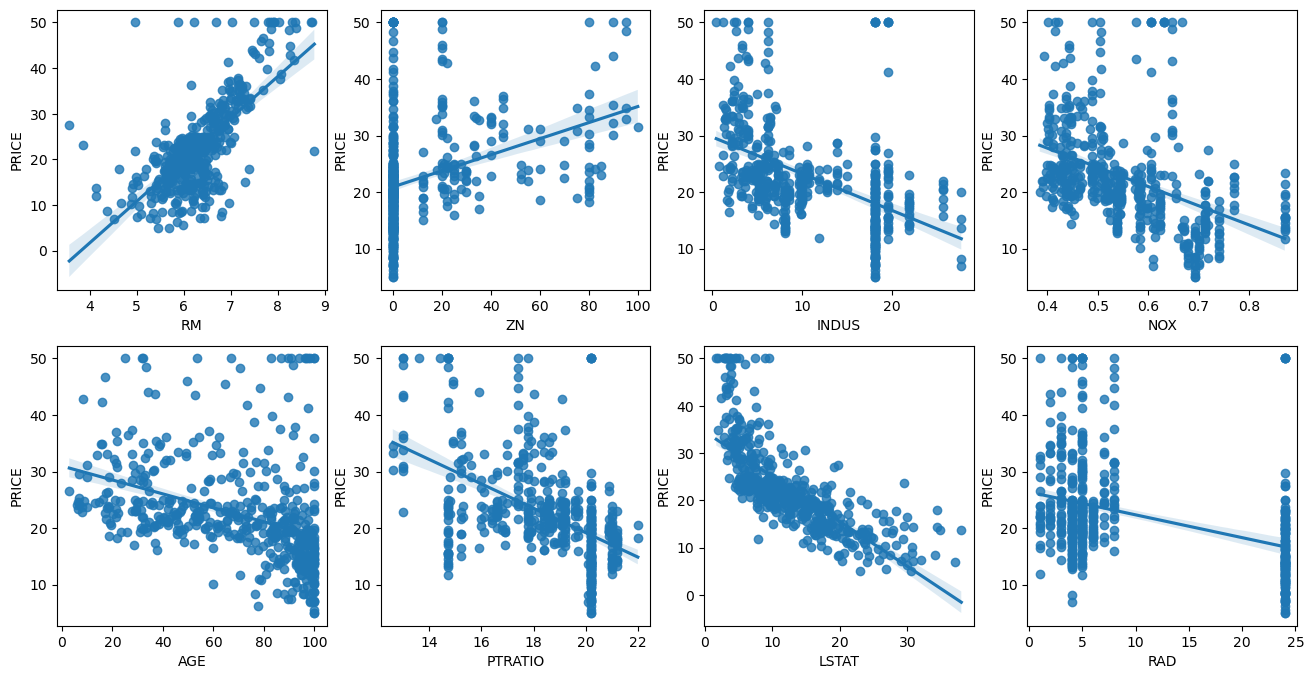

In [11]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2) # matplotlib의 subplots()은 여러 개의 그래프를 한번에 표현 시 사용
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

fig1 = plt.gcf()
fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')

**학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [13]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.99559517216451
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [14]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

**RM이 양의 값으로 회귀계수가 가장 크며, NOX 피처의 회귀계수 - 값이 너무 커보이므로 최적화 수행이 필요하다고 판단한다**

- 5개 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE, RMSE를 측정한다. 사이킷런은 RMSE를 제공하지 않으므로 MSE 수치 결과를 RMSE로 변환해야 한다. 
- cross_val_score()의 인자로 scoring='neg_mean_squares_error'를 지정하면 반환되는 수치 값은 음수 값이다. ***사이킷런에서는 지표 평가 기준이 높은 지표 값일수록 좋은 모델인데 반해, 일반적으로 회귀는 MSE 값이 낮을수록 좋은 회귀 모델이므로 (-1)을 곱해 보정이 필요하다.***
- scoring='neg_mean_squares_error'로 사이킷런의 Scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환한다. 따라서 cross_val_score()에서 반환된 값에 다시 -1을 곱해야 양의 값인 원래 모델에서 게산된 MSE 값이 된다.
- 마지막으로 이렇게 변환된 MSE 값에 넘파이의 sqrt() 함수를 적용해 RMES를 구할 수 있다.

In [15]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## 5-5. Polynomial Regression과 오버피팅/언더피팅 이해
### Polynomial Regression 이해
- 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항 회귀라고 한다.
- **다항 회귀는 비선형 회귀가 아닌 선형 회귀이다.** 회귀에서 선형/비선형 회귀를 나누는 기준은 **회귀 계수**가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관하다.
- 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다. 대신 다항 회귀 역시 선형 회귀이므로 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다.

**PolynomialFeatures 클래스로 다항식 변환**
- fit(), transform() 메서드를 통해 이 같은 변환 작업을 수행한다.
![](./image02.png)

#### PolynomaialFeatures 클래스를 이용한 단항 값 $[x_1,x_2]$를 2차 다항값으로 $[1,x_1,x_2,x_1^2,x_1x_2,x_2^2]$로 변환하는 예제

In [16]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)


일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


#### 3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성. 즉 회귀식은 결정값 $y = 1+ 2x_1 + 3x_1^2 + 4x_2^3$

In [17]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


#### 3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습
- $[1,x_1,x_2,x_1^2,x_1x_2,x_2^2,x_2^3,x_1^2x_2,x_1x_2^2,x_1^3]$, 10개의 다항 계수로 변환

In [18]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


**사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습**  

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해줍니다. 

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))


Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

**cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듬**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

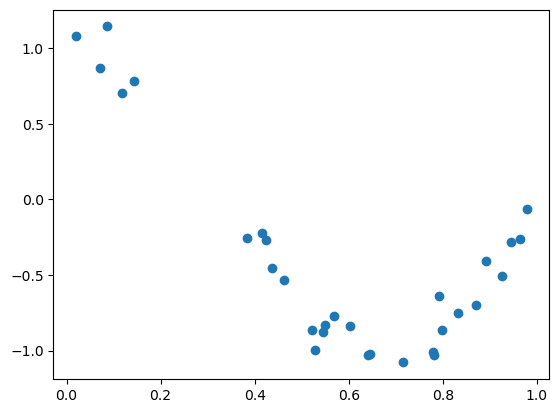

In [21]:
plt.scatter(X, y)

#### 다항 회귀의 차수를 1, 4, 15로 변환시켜가며 예측 결과 비교 시작!!
- 다항식 차수 별로 학습을 수행한 뒤 cross_val_score()로 MSE 값을 구해 차수별 예측 성능을 평가한다.
- 0부터 1까지 균일하기 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선 출력


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.0432087498723184 입니다.

Degree 15 회귀 계수는 [-2.98294000e+03  1.03899850e+05 -1.87416981e+06  2.03717199e+07
 -1.44874017e+08  7.09319141e+08 -2.47067173e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920643e+09 -1.70382078e+08] 입니다.
Degree 15 MSE 는 182581084.8263125 입니다.


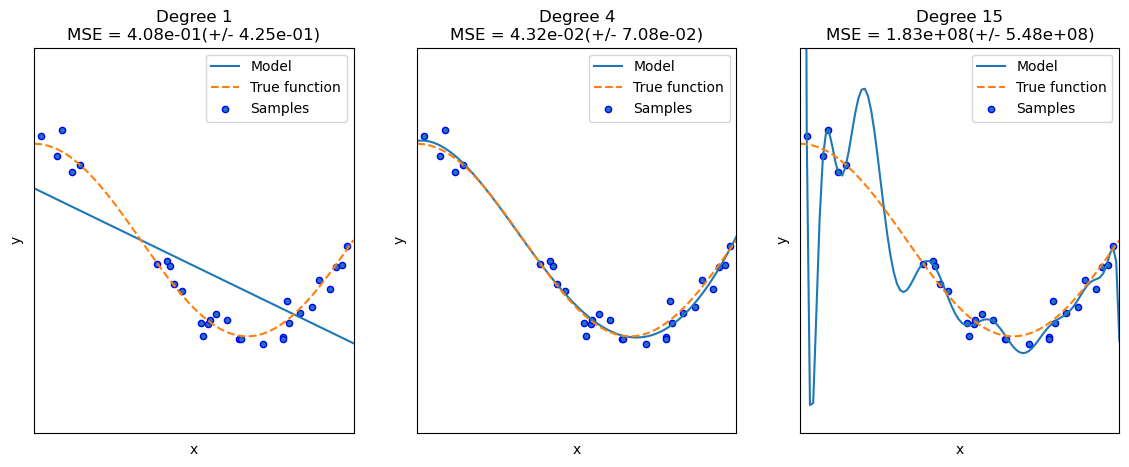

In [22]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
          
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

**평가**

- Degree 4 예측 곡선이 실제 데이터 세트와 가장 유사한 모습이다. MSE 값은 0.04로 가장 작은 값이다. 즉, 가장 뛰어난 예측 성능을 나타내고 잇다.
- 좋은 예측 모델 : 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌 모델을 의미!!

### 편향-분산 트레이드오프 (Bias-Variance Trade-off)
- 일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있다.
- 즉, 편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아진다(과적합)
- 편향과 분산이 서로 트레이드 오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.

## 5-6. Regularized Linear Models – Ridge, Lasso
- RSS를 최소화하는, 즉 실제값과 예측값의 차이를 최소화하는 것만 고려하는 선형 모델만 고려. 이는 학습 데이터에만 지나치게 맞춰지며 회귀 계수가 쉽게 커지게 됨. 이럴 경우 변동성이 오히려 심해져 테스트 데이터 세트에서는 예측 성능이 저하되기 쉽다.
- 이를 반영해 비용함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 한다.

- 회귀 계수의 크기를 제어해 과적합을 개선하려면 비용(Cost) 함수의 목표가 다음과 같이 변화한다.


$$ 비용 함수 목표 = Min(RSS(W) + alpha*││W││_2^2 $$

- 여기서 $alpha$는 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터이다.
    - $alpha$가 0(또는 매우 작은 값)이라면 비용 함수 식은 기존과 동일한 $Min(RSS(W))$가 될 것이다.
    - 반면 $alpha$가 무한대(또는 매우 큰 값)이라면 $RSS(W)$에 비해 $alpha*││W││_2^2 $ 값이 너무 커지게 되므로 W 값을 0으로 만들어야 Cost가 최소화되는 비용 함수 목표를 달성할 수 있다.


- **즉, $alpha$를 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 $alpha$ 값을 작게 하면 회귀 계수 W 값이 커져도 어느정도 상쇄 가능하므로 학습 데이터 적합을 더 개선할 수 있다.**
    - **즉, $alpha$를 0부터 지속적으로 값을 증가시키면 회귀 계수 값의 크기를 감소시킬 수 있다.**
    - **이처럼 비용 함수에 $alpha$ 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제(Regularization)이라고 부른다.**

- L2 규제 : $alpha*││W││_2^2$와 같이 W의 제곱에 대해 패널티를 부여. 이를 이용하는 회귀를 ***릿지 회귀***라고 함.
- L1 규제 : $alpha*││W││_1$와 같이 W의 절댓값에 대해 패널티를 부여. 이를 이용하는 회귀를 ***라쏘 회귀***라고 함.

### Regularized Linear Model - Ridge Regression

- 사이킷런의 Ridge 클래스를 통해 릿지 회귀 구현, 주요 파라미터는 alpha이며, 이는 릿지 회귀의 alpha L2 규제 계수에 해당한다.

In [23]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


앞 예제의 규제가 없는 LinearReggression의 RMSE 평균인 5.829보다 더 뛰어난 예측 성능을 보여준다.

**alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정**

In [24]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


alpha가 커짐에 따라 평균 RMSE가 제일 우수

**각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성**

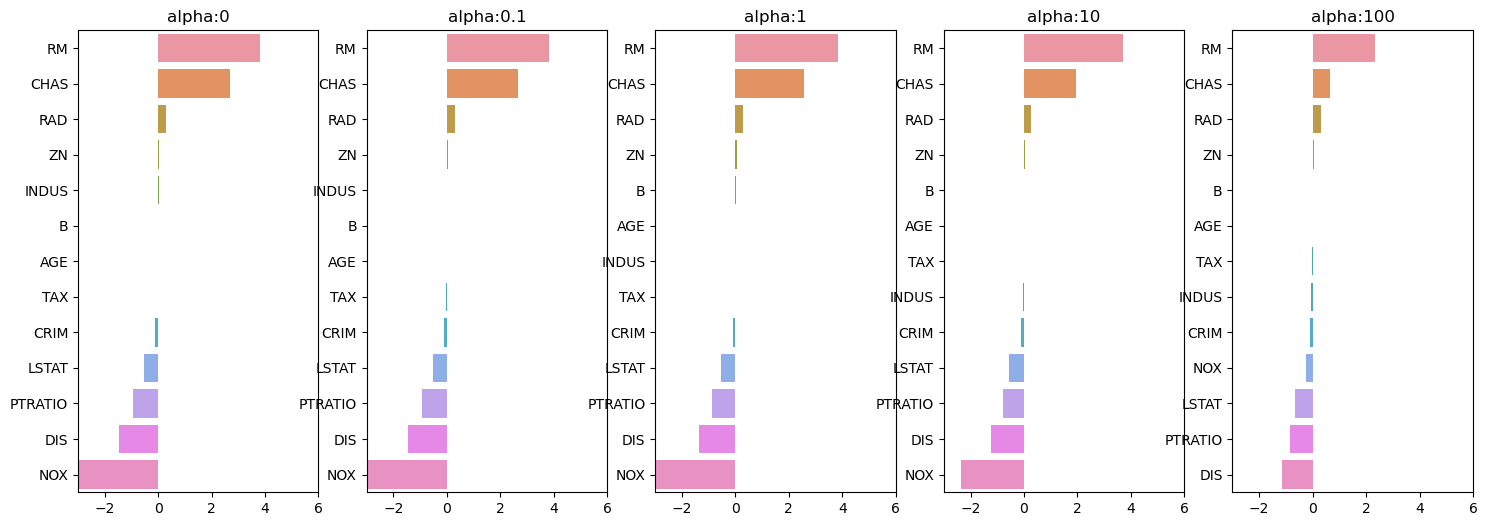

In [25]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()



**시각적으로 alpha가 증가함에따라 회귀계수가 점점 작아짐을 확인할 수 있다.**

**alpha 값에 따른 컬럼별 회귀계수 출력**

In [26]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


**역시 alpha가 증가함에따라 회귀계수는 점점 작아진다. 하지만 릿지 회귀의 경우 회귀 계수가 0이 되지 않는다**

### 라쏘 회귀

- L2 규제가 회귀 계수의 크기를 감소시키는 데 반해, L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거한다. 
- 이러한 측면에서 L1 규제는 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가지고 있다.


- 사이킷런은 Lasso 클래스를 통해 라쏘 회귀 구현, 주요 생성 파라미터는 alpha이며 이는 alpha L1 규제 게수에 해당.

In [27]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [28]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [29]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


### 엘라스틱넷 회귀
- 엘라스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀이다. 따라서 비용함수의 목표는 $RSS(W) + alpha*││W││_2^2 + alpha*││W││_1$ 식을 최소화하는 W를 찾는 것이다.
- 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하다. 이로 인해 alpha 값에 따라 회귀계수가 급격히 변동할 수 있는데 이를 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것!!
- 단점으로는 L1, L2 규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸린다.

- 사이킷런의 ElasticNet 클래스를 통해 엘라스틱넷 회귀를 구현한다.
    - 주요 파라미터는 alpha, l1_ratio이다.
    - $a*L1 + b*L2$로 엘라스틱넷 규제가 정의되므로 a, b가 각각 L1, L2 규제의 alpha 값이다.
    - 따라서 l1_ration 값은 a / (a+b)이다.

In [30]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [31]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


alpha가 0.5일 때 가장 좋은 예측 성능을 보이고 있다. alpha 값에 따른 피처들의 회귀 게수 값이 라쏘보다는 상대적으로 0이 되는 값이 적음을 알 수 있다.

### 선형 회귀 모델을 위한 데이터 변환
- 각각의 선형 회귀 기법 알고리즘에서 하이퍼 파라미터를 변경해가며 최적의 예측 성능을 찾아야 한다. 이를 위해 먼저 선행되어야 하는 데이터 분포도의 정규화와 인코딩 방법이 매우 중요하다.

- 사이킷런을 이용해 피처 데이터 세트에 적용하는 변환 작업
1. StandardScaler 클래스를 이용해 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화를 수행
2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법이다. 1번 방법을 통해 예측 성능에 향상이 없을 경우 이 같은 방법을 적용
3. 원래 값에 log 함수를 취하면 보다 정규 분포에 가까운 형태로 값이 분포하게 된다. 이를 로그 변환이라고 한다. 실제 선형 회귀에서 1, 2번보다 훨씬 많이 사용되는 변환 방법이다.

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [33]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 
(506, 104) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMS

선형 회귀를 적용하려는 데이터 세트에 데이터 값의 분포가 심하게 왜곡되어 있을 경우에 이처럼 로그 변환을 적용하는 것이 좋은 결과를 기대할 수 있다.